In [1]:
import numpy as np
import pandas as pd
from TFT import TFT

2024-10-02 14:56:00.459002: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tft = TFT(cache_data=False)

Create simulated data

In [3]:
n_days = 100
n_daily_vars = 5

df_daily = pd.DataFrame(
    np.random.randn(n_days, n_daily_vars),
    index=pd.date_range(start="2024-01-01", periods=n_days, freq="D")
)
df_daily.columns = [f"daily_var{i}" for i in range(n_daily_vars)]
df_daily

,daily_var0,daily_var1,daily_var2,daily_var3
2024-01-01,-0.505635,1.181059,0.819037,-1.743469
2024-01-02,0.000936,-1.245783,-0.096430,0.258892
2024-01-03,1.077724,1.856334,0.244342,1.247628
2024-01-04,-0.658655,-0.663206,-0.675824,1.457595
2024-01-05,2.108784,0.305730,0.294474,0.331886
...,...,...,...,...
2024-04-05,-0.517573,0.372815,-1.267407,-1.224664
2024-04-06,-1.028055,-0.142492,0.041300,-0.678092
2024-04-07,0.193211,0.160475,-0.486011,0.103941
2024-04-08,-1.684884,1.004396,-1.799258,-0.419832


In [4]:
n_months = 8
n_monthly_vars = 4

df_monthly = pd.DataFrame(
    np.random.randn(n_months, n_monthly_vars),
    index=pd.date_range(start="2024-01-01", periods=n_months, freq="ME")
)
df_monthly.columns = [f"monthly_var{i}" for i in range(n_monthly_vars)]
df_monthly

,monthly_var0,monthly_var1,monthly_var2,monthly_var3
2024-01-31,1.593811,1.547722,0.734816,-0.949544
2024-02-29,0.873501,-0.584596,1.050349,-1.430829
2024-03-31,-0.047780,-0.624130,0.439460,0.029807
2024-04-30,1.346824,1.776450,0.791233,0.065122
2024-05-31,-0.269695,0.729543,-0.289696,-0.541370
2024-06-30,-1.124508,-0.772921,0.246116,-0.396936
2024-07-31,0.687212,0.552583,-0.406664,-0.630306
2024-08-31,-0.849854,-0.428466,-0.978819,0.439993


Now we create the dependent variable

In [5]:
df_y = df_monthly.pop("monthly_var0")
df_y = pd.DataFrame(df_y)
df_y

,monthly_var0
2024-01-31,1.593811
2024-02-29,0.873501
2024-03-31,-0.047780
2024-04-30,1.346824
2024-05-31,-0.269695
2024-06-30,-1.124508
2024-07-31,0.687212
2024-08-31,-0.849854


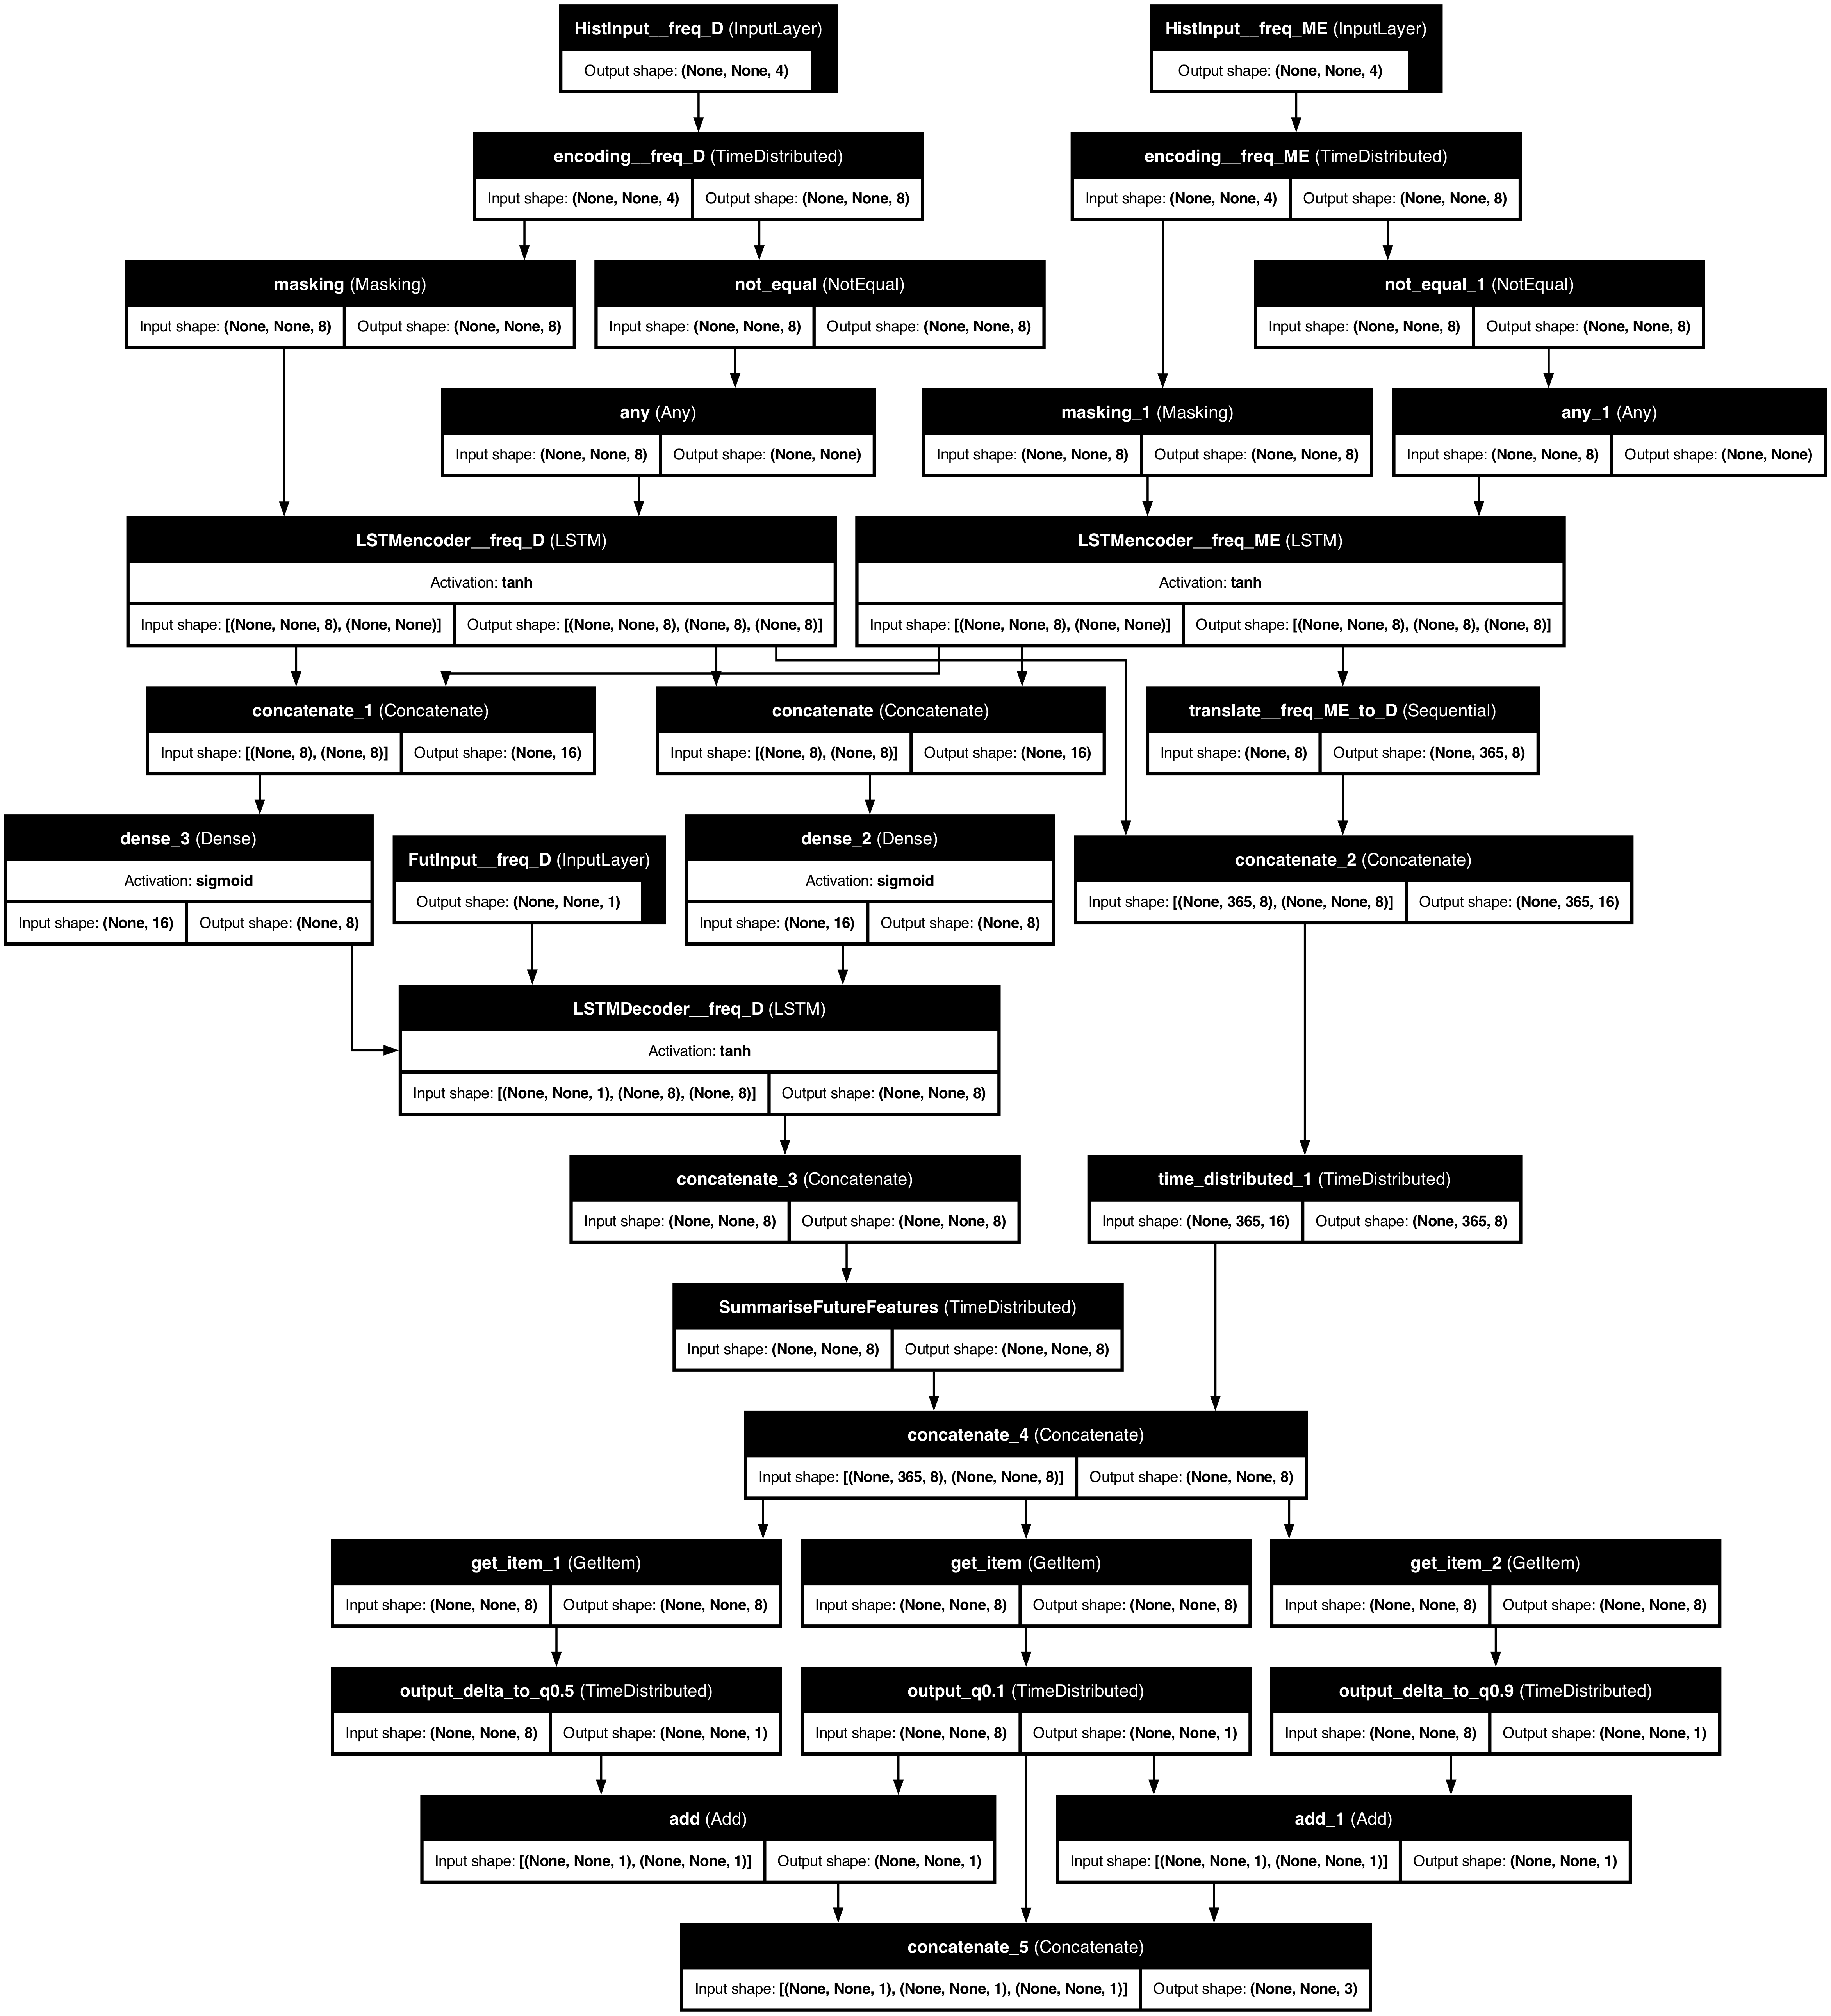

In [7]:
tft.plot_model()

In [6]:
tft.fit(
    X={"D": df_daily, "ME": df_monthly},
    y={"ME": df_y}
)

Processing `X` and `y` data.
  working out the frequencies...
  calculating ...
Processing `X` and `y` data: concluded
Shape of historical data: (None, 365, 8). Shape of future data: (None, None, 8)
SHAPE OF QOUT: ((None, None, 1), [(None, None, 1), (None, None, 1), (None, None, 1)])
SHAPE OF OUTPUTS: (None, None, 3)
Epoch 1/2


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 4 and 1 for '{{node functional_1_1/LSTMDecoder__freq_D_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](functional_1_1/LSTMDecoder__freq_D_1/strided_slice_1, functional_1_1/LSTMDecoder__freq_D_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,4], [1,32].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
  • states=('tf.Tensor(shape=(None, 8), dtype=float32)', 'tf.Tensor(shape=(None, 8), dtype=float32)')
  • training=True

In [9]:
tft.model.inputs, tft.model.outputs

([<KerasTensor shape=(None, None, 4), dtype=float32, sparse=False, name=HistInput__freq_D>,
  <KerasTensor shape=(None, None, 4), dtype=float32, sparse=False, name=HistInput__freq_ME>,
  <KerasTensor shape=(None, None, 1), dtype=float32, sparse=False, name=FutInput__freq_D>],
 [<KerasTensor shape=(None, None, 3), dtype=float32, sparse=False, name=keras_tensor_37>])